TESTING FEATURE ENGINEERING AND LOGISTIC REGRESSION:

1 ==All data points==
a) All features
b) Only pre-processed features
c) Only raw features

2 ==Removing outliers==
a) All features
b) Only pre-processed features
c) Only raw features

3 ==Removing the features with more than 70% missing values==
a) All features
b) Only pre-processed features
c) Only raw features

4 ==Removing the features with more than 30% missing values==
a) All features
b) Only pre-processed features
c) Only raw features


TAKE THE BEST SCORE OF THOSE AND TRY FEATURE ENGINEERING WITH THIS SET

Skewness transformation
Removing one item from correlated pairs of features



In [1]:
import numpy as np
import p1lib.p1lib as ml
import proj1_helpers
from Unas_code import functions as unatools
%matplotlib inline
import matplotlib.pyplot as plt
from tools_PT import skewness_correction


In [2]:
y, X, ids=proj1_helpers.load_csv_data('train.csv')
y=np.expand_dims(y, axis=1)
y[y==-1]=0
x,_,__=ml.standardise(X)
tx=ml.augment_data(np.array(x))

In [3]:
#Split data between training and test
x_train, y_train, x_test, y_test=ml.split_data(tx, y, 0.8, seed=42)

In [2]:
#DEFINE A FUNCTION THAT DIRECTLY CALCULATES THE SCORE
def predictionToClassesLogistic(y):
    """assigns the proper class to y by thresholding at 0.5"""
    y=y-0.5
    y=np.ceil(y)
    return y.astype(int)

def calculate_classification_accuracy(y, tx, w):
    """calculates the percentage of correct predictions"""
    y_pred=np.dot(tx,w)
    y_pred=ml.sigmoid(y_pred)
    class_pred=predictionToClassesLogistic(y_pred)
    class_pred[class_pred==0]=-1
    y[y==0]=-1
    compare=np.squeeze(class_pred*y)
    hits=np.sum(compare[compare==1])
    misses=-np.sum(compare[compare==-1])
    accuracy=hits/(hits+misses)
    return accuracy

In [3]:
k_fold=4


def crossval(x, y, kfold, lambda_, gamma, w_ini, max_iter, seed):
    """crossvalidation for a given gamma and lambda. Uses regularised logistic regression. Returns mean training and test scores"""
    k_indices=ml.build_k_indices(y, k_fold, seed=seed)
    all_indices = np.arange(len(y))
    x_tr=[]
    y_tr=[]
    x_te=[]
    y_te=[]
    for k in range(k_fold):
        test_indices = k_indices[k]
        train_indices = [i for i in all_indices if i not in test_indices]
        x_te.append(x[test_indices])
        y_te.append(y[test_indices])
        x_tr.append(x[train_indices])
        y_tr.append(y[train_indices])
    tr_scores = []
    te_scores = []
    for k in range(k_fold):          
        w_tr, _=ml.reg_logistic_regression(y_tr[k], x_tr[k], lambda_, w_ini, max_iter, gamma)
        tr_score=calculate_classification_accuracy(y_tr[k], x_tr[k], w_tr)
        te_score=calculate_classification_accuracy(y_te[k], x_te[k], w_tr)            
        tr_scores.append(tr_score)
        te_scores.append(te_score)           
    mean_tr_score=np.mean(tr_scores)
    mean_te_score=np.mean(te_scores)
    print('lambda: %f, gamma: %f, training score: %f, test score: %f' %(lambda_,gamma, mean_tr_score, mean_te_score))
    return mean_te_score, mean_tr_score


def crossval_grid(x_train, y_train, x_test, y_test, kfold, lambdas, gammas, w_ini, max_iter, seed):
    """performs k-fold crossvalidation on a grid of lambdas and gammas. plots training and test accuracy for gamma-lambda pairs. Returns optimal gamma and lambda and test score"""
    gs=[]
    ls=[]
    scores=[]
    train_scoremap=np.zeros((len(lambdas), len(gammas)))
    test_scoremap=np.zeros((len(lambdas), len(gammas)))
    i=0
 
    for l in lambdas:
        j=0
        for g in gammas:
            print('lambda: %f, opt. gamma: %f' %(l, g))
            gs.append(g)
            ls.append(l)
            te_score, tr_score=crossval(x_train, y_train, kfold, l, g, w_ini, max_iter, seed)
            scores.append(te_score)
            train_scoremap[i,j]=tr_score
            test_scoremap[i,j]=te_score
            j+=1
        i+=1
    opt_g, opt_l, best_score=gs[np.argmax(scores)], ls[np.argmax(scores)], np.max(scores)
    print('Crossvalidation best score: %f, opt. lambda: %f, opt. gamma: %f' %(best_score, opt_l, opt_g))
    opt_weights,_=ml.reg_logistic_regression(y_train, x_train, opt_l, w_ini, max_iter, opt_g)
    test_score=calculate_classification_accuracy(y_test, x_test, opt_weights)
    
    
    plt.subplot(211)
    plt.contourf(gammas, lambdas, train_scoremap)
    plt.xlabel('gamma')
    plt.ylabel('lambda')
    plt.colorbar()
    plt.subplot(212)
    plt.contourf(gammas, lambdas, test_scoremap)
    plt.xlabel('gamma')
    plt.ylabel('lambda')
    plt.colorbar()
    plt.show()
    
    print('Test score for optimised parameters: %f' %test_score)
    return opt_l, opt_g, test_score    

lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5457438584273734
Current iteration=200, loss=0.5264198165557732
Current iteration=300, loss=0.5187104433864341
Current iteration=400, loss=0.5140716633845258
Current iteration=500, loss=0.5106945675513556
Current iteration=600, loss=0.508021852605996
Current iteration=700, loss=0.5058232865268537
Current iteration=800, loss=0.5039774626615167
Current iteration=900, loss=0.5024080426519524
Current iteration=1000, loss=0.5010615244288201
Current iteration=1100, loss=0.49989801014687246
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5499881107293877
Current iteration=200, loss=0.5317016004560129
Current iteration=300, loss=0.5244543229317087
Current iteration=400, loss=0.5200811071952877
Current iteration=500, loss=0.5168953404636122
Current iteration=600, loss=0.514383206508072
Current iteration=700, loss=0.5123290880824284
Current iteration=800, l

Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.539514885929478
Current iteration=200, loss=0.5329252845369319
Current iteration=300, loss=0.5308085367229637
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.54420182622132
Current iteration=200, loss=0.5379826707400521
Current iteration=300, loss=0.5359843162341378
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5407290890935549
Current iteration=200, loss=0.5345593993634273
Current iteration=300, loss=0.5326226051098861
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5409548370687327
Current iteration=200, loss=0.5345938278037022
Current iteration=300, loss=0.5325579363572778
lambda: 0.010000, gamma: 0.100000, training score: 0.742367, test score: 0.739800
lambda: 0.010000, opt. gamma: 0.250000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5316189180675198
Current iteration=0, loss=0.6931471605599454
C

Current iteration=1000, loss=0.7505096365354935
Current iteration=1100, loss=0.7505096365354935
Current iteration=1200, loss=0.7505096365354935
Current iteration=1300, loss=0.7505096365354935
Current iteration=1400, loss=0.7505096365354935
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.7597052444168367
Current iteration=200, loss=0.7597052210622238
Current iteration=300, loss=0.7597052210620102
Current iteration=400, loss=0.7597052210620102
Current iteration=500, loss=0.7597052210620101
Current iteration=600, loss=0.7597052210620101
Current iteration=700, loss=0.7597052210620101
Current iteration=800, loss=0.7597052210620101
Current iteration=900, loss=0.7597052210620101
Current iteration=1000, loss=0.7597052210620101
Current iteration=1100, loss=0.7597052210620101
Current iteration=1200, loss=0.7597052210620101
Current iteration=1300, loss=0.7597052210620101
Current iteration=1400, loss=0.7597052210620101
Current iteration=0, loss=0.6931471605599454
Current

Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.8706175647812181
Current iteration=200, loss=0.8706175647812038
Current iteration=300, loss=0.870617564781204
Current iteration=400, loss=0.870617564781204
Current iteration=500, loss=0.870617564781204
Current iteration=600, loss=0.870617564781204
Current iteration=700, loss=0.870617564781204
Current iteration=800, loss=0.870617564781204
Current iteration=900, loss=0.870617564781204
Current iteration=1000, loss=0.870617564781204
Current iteration=1100, loss=0.870617564781204
Current iteration=1200, loss=0.870617564781204
Current iteration=1300, loss=0.870617564781204
Current iteration=1400, loss=0.870617564781204
lambda: 0.100000, gamma: 1.000000, training score: 0.538600, test score: 0.539000
Crossvalidation best score: 0.749300, opt. lambda: 0.000000, opt. gamma: 0.750000
Current iteration=0, loss=0.6931471605599451
Current iteration=100, loss=0.500333176787253
Current iteration=200, loss=0.49604901729408646


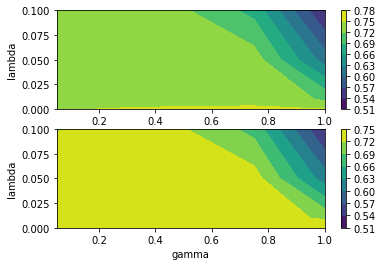

Test score for optimised parameters: 0.750100


(0.0, 0.75, 0.7501)

In [6]:
sampsize=10000
x_toy_tr=x_train[:sampsize,:]
y_toy_tr=y_train[:sampsize,:]
x_toy_te=x_test[:sampsize,:]
y_toy_te=y_test[:sampsize,:]
#lambdas=np.array([0, 0.05, 0.1, 0.5, 1, 1.5])
lambdas=np.array([0, 0.01, 0.05, 0.1])
gammas=np.array([0.05, 0.1, 0.25, 0.5, 0.75, 1])
w_ini=np.zeros((x_toy_tr.shape[1],1))
crossval_grid(x_toy_tr, y_toy_tr, x_toy_te, y_toy_te, 4, lambdas, gammas, w_ini, 1500, 42, 20)

lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5327855557850758
Current iteration=200, loss=0.5208514935586713
Current iteration=300, loss=0.5149315251221098
Current iteration=400, loss=0.511005906437574
Current iteration=500, loss=0.5082156913605026
Current iteration=600, loss=0.5061656769478793
Current iteration=700, loss=0.5046245219629704
Current iteration=800, loss=0.5034450472049325
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5314263731990185
Current iteration=200, loss=0.5194832312923232
Current iteration=300, loss=0.5135738810494963
Current iteration=400, loss=0.5096809022339907
Current iteration=500, loss=0.5069195866949966
Current iteration=600, loss=0.5048835550957849
Current iteration=700, loss=0.5033482137951738
Current iteration=800, loss=0.5021704758758424
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.530858902327154
Current iteration=200, loss=0

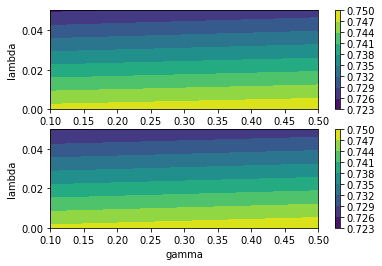

Test score for optimised parameters: 0.748760


(0.0, 0.5, 0.74876)

In [7]:
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_train.shape[1],1))
crossval_grid(x_train, y_train, x_test, y_test, 4, lambdas, gammas, w_ini, 1000, 42, 50)

In [8]:
#w_ini=np.zeros((tx.shape[1],1))
#lambdas=np.logspace(-6,0, num=7)
#lambdas=np.array([0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5])
#lambda_opt, score=crossval_lambda(x_train, y_train, 4, lambdas, 1e-2, w_ini, 1000, 42)

In [9]:
#print('lambda opt: %f' %lambda_opt)
#gammas=np.logspace(-6, -2, num=5)
#gammas=np.array([0.005, 0.01, 0.025, 0.05])
#gamma_opt, score=crossval_gamma(x_train, y_train, 4, lambda_opt, gammas, w_ini, 1000, 42)

In [10]:
# DO THE CROSSVALIDATION WITH RESPECT TO THE CLASSIFICATION ERROR

In [11]:
#opt_weights,_=ml.reg_logistic_regression(y_train, x_train, lambda_opt, np.zeros((x_train.shape[1],1)), 2000, gamma_opt)


In [12]:
#score=calculate_classification_accuracy(y_test, x_test, opt_weights)
#print(score)

In [13]:
x_der_train, x_der_test =x_train[:,0:13], x_test[:,0:13]
x_raw_train, x_raw_test=x_train[:,14:], x_test[:, 14:]

lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5437303403986137
Current iteration=200, loss=0.5373017058758612
Current iteration=300, loss=0.5350505506634639
Current iteration=400, loss=0.5336616406586427
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5423441991856518
Current iteration=200, loss=0.5358636499495845
Current iteration=300, loss=0.5336088282211251
Current iteration=400, loss=0.5322184677360098
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5414954089858012
Current iteration=200, loss=0.5349905174025018
Current iteration=300, loss=0.5327184281431077
Current iteration=400, loss=0.5313158378107228
Current iteration=0, loss=0.6931471605599455
Current iteration=100, loss=0.5401750469049619
Current iteration=200, loss=0.5336099786858417
Current iteration=300, loss=0.5314000174329592
Current iteration=400, loss=0.5300606484711798
lambda: 0.000000, gamma: 0.10

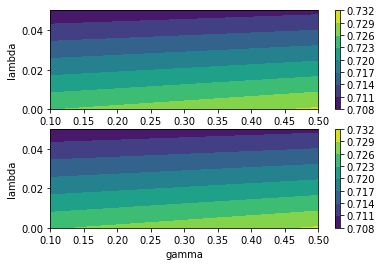

Test score for optimised parameters: 0.728980


(0.0, 0.5, 0.72898)

In [14]:
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_der_train.shape[1],1))
crossval_grid(x_der_train, y_train, x_der_test, y_test, 4, lambdas, gammas, w_ini, 1000, 42, 50)

lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.6532634649230142
Current iteration=200, loss=0.6507559045067381
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.6525087568622007
Current iteration=200, loss=0.6500155367900313
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.6536589794414303
Current iteration=200, loss=0.65122835756426
Current iteration=0, loss=0.6931471605599455
Current iteration=100, loss=0.6530468834650626
Current iteration=200, loss=0.6505877603748084
lambda: 0.000000, gamma: 0.100000, training score: 0.660497, test score: 0.660330
lambda: 0.000000, opt. gamma: 0.500000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.6481345458345077
Current iteration=200, loss=0.646234720917889
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.6474686604390147
Current iteration=200, loss=0.6456132867887674
Current i

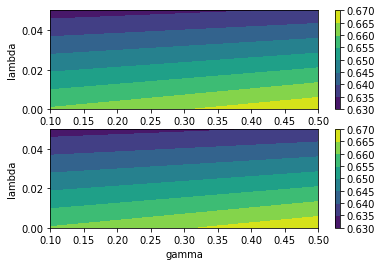

Test score for optimised parameters: 0.666200


(0.0, 0.5, 0.6662)

In [15]:
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_raw_train.shape[1],1))
crossval_grid(x_raw_train, y_train, x_raw_test, y_test, 4, lambdas, gammas, w_ini, 1000, 42, 50)

In [16]:
#RESOLVING 999s
y, X, ids=proj1_helpers.load_csv_data('train.csv')
y=np.expand_dims(y, axis=1)
y[y==-1]=0
tx_cleaned=unatools.resolve999values(X, 0, 0)

tx_cleaned,_,__=ml.standardise(tx_cleaned)
tx_cleaned=ml.augment_data(np.array(tx_cleaned))
x_cl_train, y_cl_train, x_cl_test, y_cl_test=ml.split_data(tx_cleaned, y, 0.8, seed=42)
x_clder_train, x_clder_test=x_cl_train[:,0:13], x_cl_test[:, 0:13]
x_clraw_train, x_clraw_test=x_cl_train[:,14:], x_cl_test[:, 14:]

Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544


lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5259258110593067
Current iteration=200, loss=0.5161892231565685
Current iteration=300, loss=0.5119018425763955
Current iteration=400, loss=0.5092451817434136
Current iteration=500, loss=0.5074260711643919
Current iteration=600, loss=0.5061153035076529
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5244017559357441
Current iteration=200, loss=0.5145503934835639
Current iteration=300, loss=0.5102133183810604
Current iteration=400, loss=0.5075290475933995
Current iteration=500, loss=0.5057023807616174
Current iteration=600, loss=0.5043895189479868
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5240119668660428
Current iteration=200, loss=0.5140839198519359
Current iteration=300, loss=0.5097138054829824
Current iteration=400, loss=0.5070118706910344
Current iteration=500, loss=0.5051721186887571
Current iteration=600, loss

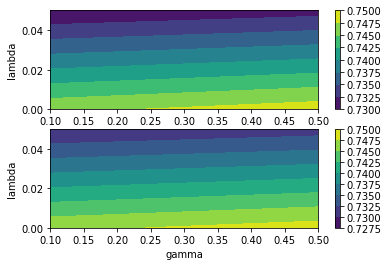

Test score for optimised parameters: 0.750040


(0.0, 0.5, 0.75004)

In [17]:
#ALL FEATURES WITH 999s REPLACED WITH FEATURE MEAN
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_cl_train.shape[1],1))
crossval_grid(x_cl_train, y_cl_train, x_cl_test, y_cl_test, 4, lambdas, gammas, w_ini, 1000, 42, 50)

In [18]:
max_iter=1001

lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5374107447345279
Current iteration=200, loss=0.532333925953335
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.535897031328473
Current iteration=200, loss=0.530728192844912
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5352969544712184
Current iteration=200, loss=0.5300960029193942
Current iteration=0, loss=0.6931471605599455
Current iteration=100, loss=0.5345636346984732
Current iteration=200, loss=0.529238984692883
lambda: 0.000000, gamma: 0.100000, training score: 0.725255, test score: 0.725240
lambda: 0.000000, opt. gamma: 0.500000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5304254816673202
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5287731690057121
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.528075226933317
Current itera

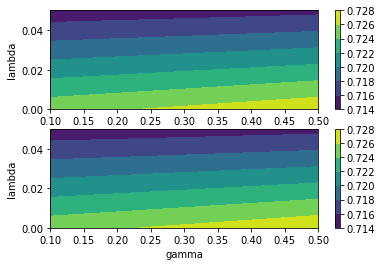

Test score for optimised parameters: 0.726960


(0.0, 0.5, 0.72696)

In [19]:
#DERIVED FEATURES WITH 999s REPLACED WITH FEATURE MEAN
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_clder_train.shape[1],1))
crossval_grid(x_clder_train, y_cl_train, x_clder_test, y_cl_test, 4, lambdas, gammas, w_ini, max_iter, 42, 50)

lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.6560252552951108
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.655008978310564
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.6563107894187328
Current iteration=0, loss=0.6931471605599455
Current iteration=100, loss=0.6556482059041631
lambda: 0.000000, gamma: 0.100000, training score: 0.668172, test score: 0.668160
lambda: 0.000000, opt. gamma: 0.500000
Current iteration=0, loss=0.6931471605599454
Current iteration=0, loss=0.6931471605599456
Current iteration=0, loss=0.6931471605599456
Current iteration=0, loss=0.6931471605599455
lambda: 0.000000, gamma: 0.500000, training score: 0.671140, test score: 0.671125
lambda: 0.050000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=0, loss=0.6931471605599456
Current iteration=0, loss=0.6931471605599456
Current iteration=0, loss=0.693147160

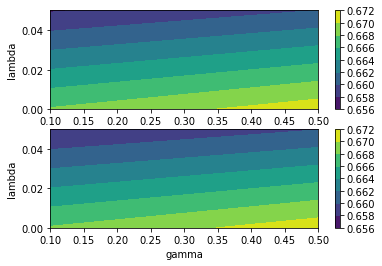

Test score for optimised parameters: 0.666800


(0.0, 0.5, 0.6668)

In [20]:
#RAW FEATURES WITH 999s REPLACED WITH FEATURE MEAN
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_clraw_train.shape[1],1))
crossval_grid(x_clraw_train, y_cl_train, x_clraw_test, y_cl_test, 4, lambdas, gammas, w_ini, max_iter, 42, 50)

In [21]:
# RESOLVING 999s AND REMOVING OUTLIERS
y, X, ids=proj1_helpers.load_csv_data('train.csv')
y=np.expand_dims(y, axis=1)
y[y==-1]=0
tx_cleaned=unatools.resolve999values(X, 0, 0)
tx_cleaned=unatools.removeOutliers(tx_cleaned, 95)

tx_cleaned,_,__=ml.standardise(tx_cleaned)
tx_cleaned=ml.augment_data(np.array(x))
x_cl_train, y_cl_train, x_cl_test, y_cl_test=ml.split_data(tx_cleaned, y, 0.8, seed=42)

Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544


lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5327855557850758
Current iteration=200, loss=0.5208514935586713
Current iteration=300, loss=0.5149315251221098
Current iteration=400, loss=0.511005906437574
Current iteration=500, loss=0.5082156913605026
Current iteration=600, loss=0.5061656769478793
Current iteration=700, loss=0.5046245219629704
Current iteration=800, loss=0.5034450472049325
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5314263731990185
Current iteration=200, loss=0.5194832312923232
Current iteration=300, loss=0.5135738810494963
Current iteration=400, loss=0.5096809022339907
Current iteration=500, loss=0.5069195866949966
Current iteration=600, loss=0.5048835550957849
Current iteration=700, loss=0.5033482137951738
Current iteration=800, loss=0.5021704758758424
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.530858902327154
Current iteration=200, loss=0

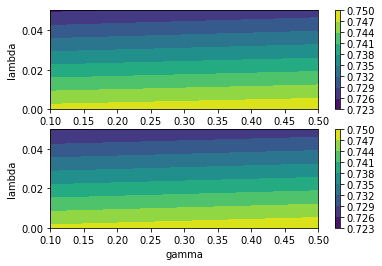

Test score for optimised parameters: 0.748760


(0.0, 0.5, 0.74876)

In [22]:
#ALL FEATURES WITH 999s REPLACED WITH FEATURE MEAN AND OUTLIERS REMOVED
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_cl_train.shape[1],1))
crossval_grid(x_cl_train, y_cl_train, x_cl_test, y_cl_test, 4, lambdas, gammas, w_ini, max_iter, 42, 50)

In [23]:
#RESOLVING 999s, REMOVING OUTLIERS AND REMOVING FEATURES WITH MORE THAN 50% OF MISSING VALUES
y, X, ids=proj1_helpers.load_csv_data('train.csv')
y=np.expand_dims(y, axis=1)
y[y==-1]=0
toremove=np.array([28, 27, 26, 12, 6, 5, 4])
X_cleaned=np.delete(X, toremove, axis=1)
tx_cleaned=unatools.resolve999values(X_cleaned, 0, 0)

tx_cleaned,_,__=ml.standardise(tx_cleaned)
tx_cleaned=ml.augment_data(np.array(tx_cleaned))
x_cl_train, y_cl_train, x_cl_test, y_cl_test=ml.split_data(tx_cleaned, y, 0.8, seed=42)
x_clder_train, x_clder_test=x_cl_train[:,0:13], x_cl_test[:, 0:13]
x_clraw_train, x_clraw_test=x_cl_train[:,14:], x_cl_test[:, 14:]

Number of samples when at leas one feature has value -999: 111904
Percentage of total data:  0.447616


lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5413041611738919
Current iteration=200, loss=0.5317069158909409
Current iteration=300, loss=0.5275818974255869
Current iteration=400, loss=0.5250530691226641
Current iteration=500, loss=0.5233341879756259
Current iteration=600, loss=0.5221010366405844
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5396995005603111
Current iteration=200, loss=0.5300219631840467
Current iteration=300, loss=0.5258658389840956
Current iteration=400, loss=0.5233195448318478
Current iteration=500, loss=0.5215900367239487
Current iteration=600, loss=0.520350185466219
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5390937105465328
Current iteration=200, loss=0.5293581408020603
Current iteration=300, loss=0.5251965875768413
Current iteration=400, loss=0.5226504495922375
Current iteration=500, loss=0.5209190146485818
Current iteration=600, loss=

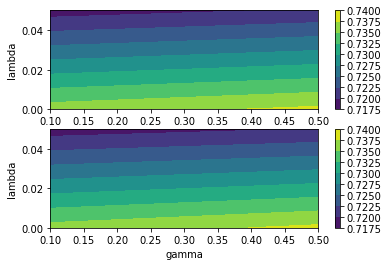

Test score for optimised parameters: 0.738340


(0.0, 0.5, 0.73834)

In [24]:
#ALL FEATURES WITH >50% of 999s REMOVED, OTHER -999s REPLACED WITH FEATURE MEAN AND OUTLIERS REMOVED
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_cl_train.shape[1],1))
crossval_grid(x_cl_train, y_cl_train, x_cl_test, y_cl_test, 4, lambdas, gammas, w_ini, max_iter, 42, 50)

In [25]:
#RESOLVING 999s, REMOVING OUTLIERS AND REMOVING FEATURES WITH MORE THAN 25% OF MISSING VALUES
y, X, ids=proj1_helpers.load_csv_data('train.csv')
y=np.expand_dims(y, axis=1)
y[y==-1]=0
toremove=np.array([28, 27, 26, 25, 24, 23, 12, 6, 5, 4])
X_cleaned=np.delete(X, toremove, axis=1)
tx_cleaned=unatools.resolve999values(X_cleaned, 0, 0)

tx_cleaned,_,__=ml.standardise(tx_cleaned)
tx_cleaned=ml.augment_data(np.array(tx_cleaned))
x_cl_train, y_cl_train, x_cl_test, y_cl_test=ml.split_data(tx_cleaned, y, 0.8, seed=42)
x_clder_train, x_clder_test=x_cl_train[:,0:13], x_cl_test[:, 0:13]
x_clraw_train, x_clraw_test=x_cl_train[:,14:], x_cl_test[:, 14:]

Number of samples when at leas one feature has value -999: 38114
Percentage of total data:  0.152456


lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5413129576878397
Current iteration=200, loss=0.5318191290095968
Current iteration=300, loss=0.5277480302597912
Current iteration=400, loss=0.5252206202366461
Current iteration=500, loss=0.5234797909833458
Current iteration=600, loss=0.5222203586799523
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5396863146382925
Current iteration=200, loss=0.53010487575437
Current iteration=300, loss=0.5260025053264754
Current iteration=400, loss=0.5234576244361329
Current iteration=500, loss=0.521705464518595
Current iteration=600, loss=0.5204381303742305
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5390979536529179
Current iteration=200, loss=0.5294664726168244
Current iteration=300, loss=0.5253588744706668
Current iteration=400, loss=0.5228127579705059
Current iteration=500, loss=0.5210573739014637
Current iteration=600, loss=0.

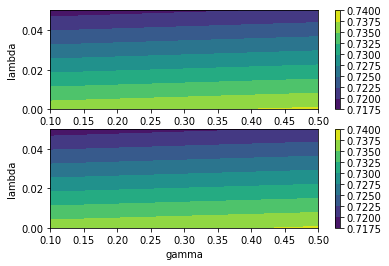

Test score for optimised parameters: 0.738780


(0.0, 0.5, 0.73878)

In [26]:
#ALL FEATURES WITH >25% of 999s REMOVED, OTHER -999s REPLACED WITH FEATURE MEAN AND OUTLIERS REMOVED
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_cl_train.shape[1],1))
crossval_grid(x_cl_train, y_cl_train, x_cl_test, y_cl_test, 4, lambdas, gammas, w_ini, max_iter, 42, 50)

In [27]:
#RESOLVING 999s, REMOVING OUTLIERS AND REMOVING FEATURES WITH MORE THAN 25% OF MISSING VALUES AND APPLYING SKEWNESS TRANSFORM
y, X, ids=proj1_helpers.load_csv_data('train.csv')
y=np.expand_dims(y, axis=1)
y[y==-1]=0
toremove=np.array([28, 27, 26, 25, 24, 23, 12, 6, 5, 4])
X_cleaned=np.delete(X, toremove, axis=1)
tx_cleaned=unatools.resolve999values(X_cleaned, 0, 0)
tx_cleaned=skewness_correction(tx_cleaned)

tx_cleaned,_,__=ml.standardise(tx_cleaned)
tx_cleaned=ml.augment_data(np.array(tx_cleaned))
x_cl_train, y_cl_train, x_cl_test, y_cl_test=ml.split_data(tx_cleaned, y, 0.8, seed=42)
x_clder_train, x_clder_test=x_cl_train[:,0:13], x_cl_test[:, 0:13]
x_clraw_train, x_clraw_test=x_cl_train[:,14:], x_cl_test[:, 14:]

Number of samples when at leas one feature has value -999: 38114
Percentage of total data:  0.152456


lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5378443771630791
Current iteration=200, loss=0.5338456904804866
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5362009119390669
Current iteration=200, loss=0.5321701206285617
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5356293633054748
Current iteration=200, loss=0.5315550208189327
Current iteration=0, loss=0.6931471605599455
Current iteration=100, loss=0.5338095918161018
Current iteration=200, loss=0.5296197885297979
lambda: 0.000000, gamma: 0.100000, training score: 0.723172, test score: 0.723230
lambda: 0.000000, opt. gamma: 0.500000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5310817511958115
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.529470180697416
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5288089446875137
Current i

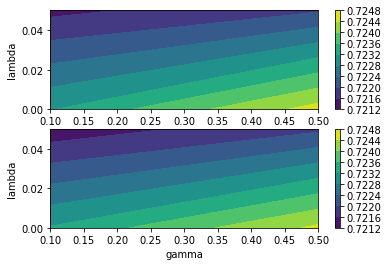

Test score for optimised parameters: 0.723060


(0.0, 0.5, 0.72306)

In [28]:
#ALL FEATURES WITH >25% of 999s REMOVED, OTHER -999s REPLACED WITH FEATURE MEAN AND OUTLIERS REMOVED AND SKEWNESS TRANSFORM
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_cl_train.shape[1],1))
crossval_grid(x_cl_train, y_cl_train, x_cl_test, y_cl_test, 4, lambdas, gammas, w_ini, max_iter, 42, 50)

Correlations:
    0 - 2 (linear)
    4 - 5 (linear)
    4 - 6 (nonlinear)
    5 - 6 (nonlinear)
    9 - 23 (linear)
    9 - 29 (linear)
    23 - 29 (linear)
    
To remove correlated features and keep max information we should remove 0, 4, 9, 23. BUT 4 and 23 are features with 25% or more -999s
So compared to last step, we only need to remove 0 and 9
    

In [29]:
#RESOLVING 999s, REMOVING OUTLIERS AND REMOVING FEATURES WITH MORE THAN 25% OF MISSING VALUES AND APPLYING SKEWNESS TRANSFORM AND REMOVING CORRELATED FEATURES
from tools_PT import skewness_correction
y, X, ids=proj1_helpers.load_csv_data('train.csv')
y=np.expand_dims(y, axis=1)
y[y==-1]=0
toremove=np.array([28, 27, 26, 25, 24, 23, 12,9, 6, 5, 4,0])
X_cleaned=np.delete(X, toremove, axis=1)
tx_cleaned=unatools.resolve999values(X_cleaned, 0, 0)
tx_cleaned=skewness_correction(tx_cleaned)

tx_cleaned,_,__=ml.standardise(tx_cleaned)
tx_cleaned=ml.augment_data(np.array(tx_cleaned))
x_cl_train, y_cl_train, x_cl_test, y_cl_test=ml.split_data(tx_cleaned, y, 0.8, seed=42)
x_clder_train, x_clder_test=x_cl_train[:,0:13], x_cl_test[:, 0:13]
x_clraw_train, x_clraw_test=x_cl_train[:,14:], x_cl_test[:, 14:]

Number of samples when at leas one feature has value -999: 0
Percentage of total data:  0.0


lambda: 0.000000, opt. gamma: 0.100000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5388875201004125
Current iteration=200, loss=0.5348800416585431
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5372928083124879
Current iteration=200, loss=0.533255378989651
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5365959110974027
Current iteration=200, loss=0.5325019656617641
Current iteration=0, loss=0.6931471605599455
Current iteration=100, loss=0.5348633524654572
Current iteration=200, loss=0.53064699010839
lambda: 0.000000, gamma: 0.100000, training score: 0.722430, test score: 0.722340
lambda: 0.000000, opt. gamma: 0.500000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.5323487786442594
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5308117561451106
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.5299698611523547
Current ite

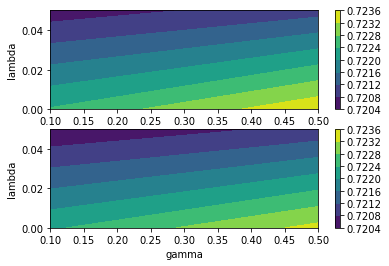

Test score for optimised parameters: 0.722620


(0.0, 0.5, 0.72262)

In [30]:
#ALL FEATURES WITH >25% of 999s REMOVED, OTHER -999s REPLACED WITH FEATURE MEAN AND OUTLIERS REMOVED AND SKEWNESS TRANSFORM AND REMOVING CORRELATED FEATURES
lambdas=np.array([0, 0.05])
gammas=np.array([0.1, 0.5])
w_ini=np.zeros((x_cl_train.shape[1],1))
crossval_grid(x_cl_train, y_cl_train, x_cl_test, y_cl_test, 4, lambdas, gammas, w_ini, max_iter, 42, 50)

In [4]:
def eta_to_theta(x):
    """converts particle direction from detector x-y plane to theta (spherical coordinates) on one column"""
    theta=2*np.arctan(np.exp(-x))
    return theta

def eta_to_theta_multiple_and_append(totransform, X):
    """Converts particle direction from ATLAS x-y plane to theta (spherical coordinates) for multiple columns and appends them to dataset"""
    totransform=totransform.T
    newcols=[]
    for i in range(totransform.shape[1]):
        tmp=eta_to_theta(totransform[:,i])
        X=np.column_stack((X,tmp))
    return X

def invalid_to_categorical(X):
    """Creates new categorical features where -999 values 1 and 0 else"""
    tmp=np.zeros(X.shape)
    tmp[X==-999]=1
    return tmp



In [5]:
def optitest(all_invas, eta_invas, eta_transform, res999, resoutliers, gauss, poly, degree):
    """performs the crossvalidation tests for a particular set of gammas, lambdas and feature transformations
    all_invas=1 if we are to include categorical features describing positions of invalid points for the whole dataset
    eta_invas=1 if we are to include categorical features corresponding to whether the "eta" features are invalid points
    eta_transform=1 if we are to compute the transform of the original dataset "eta" features and append them to the dataset
    res999=1 if the invalid points are to be replaced with the feature mean (excluding invalid values)
    resoutliers=1 if outliers at 95% percentile are to be clipped to the interval [0: 95 percentile]
    gauss=1 if we are to perform a skewness correction using log and cube transforms
    poly=1 if we are to add interaction features up to degree2 and add features corresponding to x^degree
    
    returns: optimal lambda and gamma and score on untouched test set
    """
    y, X, ids=proj1_helpers.load_csv_data('train.csv')
    y=np.expand_dims(y, axis=1)
    y[y==-1]=0
    eta_columns=np.array([X[:,14], X[:,17], X[:,24]])
    invalid_pos_all=invalid_to_categorical(X)
    invalid_pos_eta=invalid_to_categorical(eta_columns)
    x=X
    if eta_transform==True:
        x=eta_to_theta_multiple_and_append(eta_columns, x)
        print(x.shape)
    if res999==True:
        x=unatools.resolve999values(x, 0, 0)
        print(x.shape)
    if resoutliers==True:
        x=unatools.removeOutliers(x,95)
        print(x.shape)
    if gauss==True:
        x=skewness_correction(x)
        print(x.shape)
    if poly==True:
        x=unatools.build_poly(x,1,1,degree)
        print(x.shape)

    x,_,__=ml.standardise(x)
    print(x.shape)
    if all_invas==True:
        x=np.column_stack((x,invalid_pos_all))
        print(x.shape)
    if eta_invas==True:
        x=np.column_stack((x,invalid_pos_eta.T))
        print(x.shape)
    x=ml.augment_data(np.array(x))
    print(x.shape)
    
    x_train, y_train, x_test, y_test=ml.split_data(x, y, 0.8, seed=42)
    print('number of features: %i' %x.shape[1])
    max_iter=1001
    lambdas=np.array([0, 0.05])
    gammas=np.array([0.05, 0.1])
    w_ini=np.zeros((x_train.shape[1],1))

    optl, optg, testscore=crossval_grid(x_train, y_train, x_test, y_test, 4, lambdas, gammas, w_ini, max_iter, 42, 50)
    return optl, optg, testscore

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
(250000, 33)
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 660)
---
(250000, 660)
(250000, 660)
(250000, 690)
(250000, 691)
number of features: 691
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.46645208210403427
Current iteration=200, loss=0.4504526662622075
Current iteration=300, loss=0.4407840226473696
Current iteration=400, loss=0.43389266271485266
Current iteration=500, loss=0.428574146816423
Current iteration=600, loss=0.42427926871753174
Current iteration=700, loss=0.42070827442422704
Current iteration=800, loss=0.41767710421023596
Current iteration=900, loss=0.4150634456398952
Current iteration=1000, loss=0.4127814375914386
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.4650416364

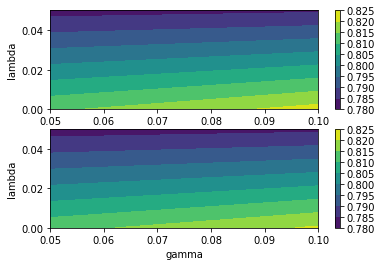

Test score for optimised parameters: 0.821540


(0.0, 0.1, 0.82154)

In [6]:
optitest(all_invas=1, eta_invas=0, eta_transform=1, res999=1, resoutliers=1, gauss=1, poly=1, degree=3)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
(250000, 33)
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 891)
---
(250000, 891)
(250000, 891)
(250000, 921)
(250000, 922)
number of features: 922
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.42622147870740834
Current iteration=200, loss=0.41183066626037623
Current iteration=300, loss=0.4052307800709448
Current iteration=400, loss=0.4011846380994022
Current iteration=500, loss=0.39832806496891765
Current iteration=600, loss=0.39614455209817284
Current iteration=700, loss=0.3943914753535859
Current iteration=800, loss=0.3929372481962243
Current iteration=900, loss=0.3917027990125338
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.42529030988949457
Current iteration=200, loss=0.4108546212

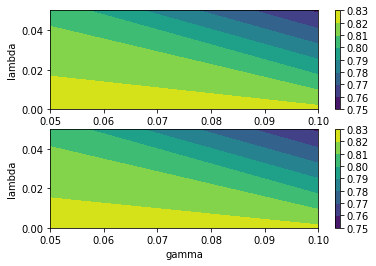

Test score for optimised parameters: 0.824580


(0.0, 0.05, 0.82458)

In [7]:
optitest(all_invas=1, eta_invas=0, eta_transform=1, res999=1, resoutliers=1, gauss=1, poly=1, degree=10)

Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 30)
---
Features dimension before polynomial basis: (250000, 30)
Features dimension after polynomial basis: (250000, 555)
---
(250000, 555)
(250000, 555)
(250000, 585)
(250000, 586)
number of features: 586
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.4766010290801294
Current iteration=200, loss=0.4624144383832092
Current iteration=300, loss=0.4552231880723198
Current iteration=400, loss=0.4504555755735697
Current iteration=500, loss=0.4468780126985684
Current iteration=600, loss=0.4440092588877445
Current iteration=700, loss=0.44162274658888007
Current iteration=800, loss=0.43958440343992883
Current iteration=900, loss=0.43780907342023956
Current iteration=1000, loss=0.43623969316195466
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.4748515285907025
Current iteration=200, loss=0.46

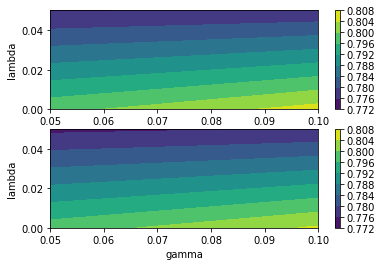

Test score for optimised parameters: 0.805260


(0.0, 0.1, 0.80526)

In [8]:
optitest(all_invas=1, eta_invas=0, eta_transform=0, res999=1, resoutliers=0, gauss=0, poly=1, degree=3)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 660)
---
(250000, 660)
(250000, 660)
(250000, 690)
(250000, 691)
number of features: 691
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.47312898249401825
Current iteration=200, loss=0.45984782155682374
Current iteration=300, loss=0.45306012921665795
Current iteration=400, loss=0.44850256150968526
Current iteration=500, loss=0.44504444346489286
Current iteration=600, loss=0.44224280935264737
Current iteration=700, loss=0.4398885323965132
Current iteration=800, loss=0.43786037686615037
Current iteration=900, loss=0.4360819257690911
Current iteration=1000, loss=0.4345016452752605
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.47139246662578566
Current iterati

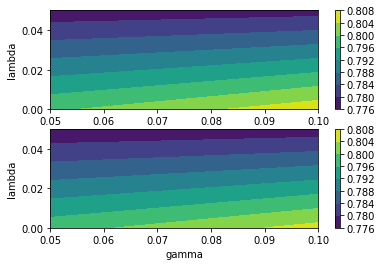

Test score for optimised parameters: 0.805560


(0.0, 0.1, 0.80556)

In [9]:
optitest(all_invas=1, eta_invas=0, eta_transform=1, res999=1, resoutliers=0, gauss=0, poly=1, degree=3)

Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 30)
---
Features dimension before polynomial basis: (250000, 30)
Features dimension after polynomial basis: (250000, 765)
---
(250000, 765)
(250000, 765)
(250000, 795)
(250000, 796)
number of features: 796
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.4761548554848241
Current iteration=200, loss=0.4618155941647256
Current iteration=300, loss=0.4542043172215884
Current iteration=400, loss=0.4491370573938787
Current iteration=500, loss=0.44536684929140785
Current iteration=600, loss=0.4423897898050322
Current iteration=700, loss=0.4399454071118678
Current iteration=800, loss=0.4378763324362707
Current iteration=900, loss=0.43608570503559113
Current iteration=1000, loss=0.4345136221046908
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.4741884150778384
Current iteration=200, loss=0.4595

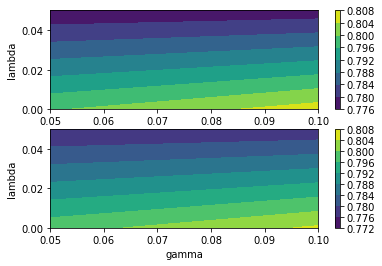

Test score for optimised parameters: 0.806140


(0.0, 0.1, 0.80614)

In [10]:
optitest(all_invas=1, eta_invas=0, eta_transform=0, res999=1, resoutliers=0, gauss=0, poly=1, degree=10)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 891)
---
(250000, 891)
(250000, 891)
(250000, 921)
(250000, 922)
number of features: 922
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.47251328174399376
Current iteration=200, loss=0.4591024137575703
Current iteration=300, loss=0.4519601189359838
Current iteration=400, loss=0.4471431972502758
Current iteration=500, loss=0.4435168935953616
Current iteration=600, loss=0.44062048276440413
Current iteration=700, loss=0.4382145543189325
Current iteration=800, loss=0.4361590050404211
Current iteration=900, loss=0.4343690132051247
Current iteration=1000, loss=0.4327898388530464
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.47053976281040066
Current iteration=20

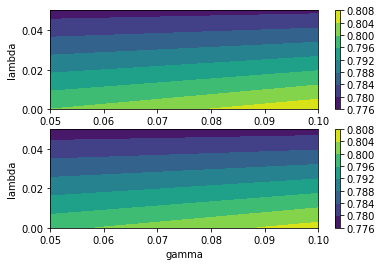

Test score for optimised parameters: 0.806720


(0.0, 0.1, 0.80672)

In [11]:
optitest(all_invas=1, eta_invas=0, eta_transform=1, res999=1, resoutliers=0, gauss=0, poly=1, degree=10)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 660)
---
(250000, 660)
(250000, 660)
(250000, 663)
(250000, 664)
number of features: 664
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.48343923711596504
Current iteration=200, loss=0.46387775037129664
Current iteration=300, loss=0.4552602029387347
Current iteration=400, loss=0.4499730339335744
Current iteration=500, loss=0.44616666314156117
Current iteration=600, loss=0.44317500336321186
Current iteration=700, loss=0.4407061987977794
Current iteration=800, loss=0.43860494282296375
Current iteration=900, loss=0.4367783248685082
Current iteration=1000, loss=0.4351659070971001
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.4815872819595806
Current iteration=

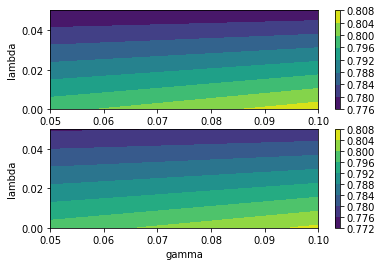

Test score for optimised parameters: 0.805280


(0.0, 0.1, 0.80528)

In [12]:
optitest(all_invas=0, eta_invas=1, eta_transform=1, res999=1, resoutliers=0, gauss=0, poly=1, degree=3)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 891)
---
(250000, 891)
(250000, 891)
(250000, 894)
(250000, 895)
number of features: 895
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.48274305802119283
Current iteration=200, loss=0.46309459711099954
Current iteration=300, loss=0.4540285604635337
Current iteration=400, loss=0.4484400689423817
Current iteration=500, loss=0.44447591791024527
Current iteration=600, loss=0.44141509955240754
Current iteration=700, loss=0.4389185083134591
Current iteration=800, loss=0.43680988622388645
Current iteration=900, loss=0.4349879298312393
Current iteration=1000, loss=0.433387650877955
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.48074341444641294
Current iteration=

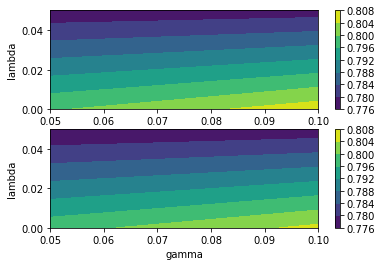

Test score for optimised parameters: 0.805620


(0.0, 0.1, 0.80562)

In [14]:
optitest(all_invas=0, eta_invas=1, eta_transform=1, res999=1, resoutliers=0, gauss=0, poly=1, degree=10)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
(250000, 33)
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 891)
---
(250000, 891)
(250000, 891)
(250000, 894)
(250000, 895)
number of features: 895
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.438811524420641
Current iteration=200, loss=0.4168384883560283
Current iteration=300, loss=0.408024752667827
Current iteration=400, loss=0.403157693419132
Current iteration=500, loss=0.39995450594132836
Current iteration=600, loss=0.39761840877409144
Current iteration=700, loss=0.39580237224630854
Current iteration=800, loss=0.39432992712016823
Current iteration=900, loss=0.39310060988041046
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.4379093686373323
Current iteration=200, loss=0.4158373376421

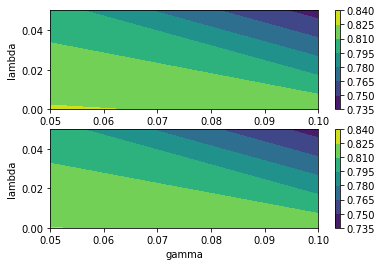

Test score for optimised parameters: 0.824280


(0.0, 0.05, 0.82428)

In [15]:
optitest(all_invas=0, eta_invas=1, eta_transform=1, res999=1, resoutliers=1, gauss=1, poly=1, degree=10)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
(250000, 33)
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 891)
---
(250000, 891)
(250000, 891)
(250000, 921)
(250000, 922)
number of features: 922
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.42622147870740834
Current iteration=200, loss=0.41183066626037623
Current iteration=300, loss=0.4052307800709448
Current iteration=400, loss=0.4011846380994022
Current iteration=500, loss=0.39832806496891765
Current iteration=600, loss=0.39614455209817284
Current iteration=700, loss=0.3943914753535859
Current iteration=800, loss=0.3929372481962243
Current iteration=900, loss=0.3917027990125338
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.42529030988949457
Current iteration=200, loss=0.4108546212

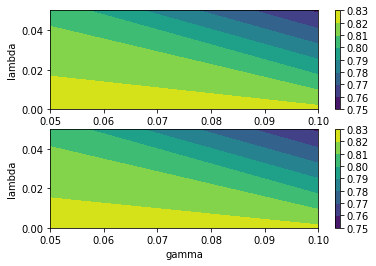

Test score for optimised parameters: 0.824580


(0.0, 0.05, 0.82458)

In [16]:
optitest(all_invas=1, eta_invas=0, eta_transform=1, res999=1, resoutliers=1, gauss=1, poly=1, degree=10)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 891)
---
(250000, 891)
(250000, 891)
(250000, 921)
(250000, 922)
number of features: 922
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.4204943177305821
Current iteration=200, loss=0.40942136848748834
Current iteration=300, loss=0.4043390647052724
Current iteration=400, loss=0.4010493066570983
Current iteration=500, loss=0.3986086482483499
Current iteration=600, loss=0.39666757375753436
Current iteration=700, loss=0.3950586057009023
Current iteration=800, loss=0.39368781211548043
Current iteration=900, loss=0.3924967282319384
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.4193780101073395
Current iteration=200, loss=0.40827435586676125
Current

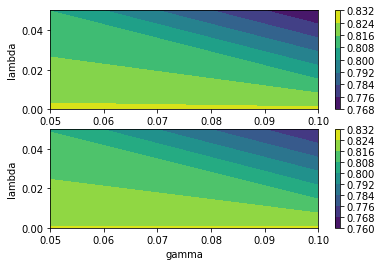

Test score for optimised parameters: 0.822620


(0.0, 0.1, 0.82262)

In [17]:
optitest(all_invas=1, eta_invas=0, eta_transform=1, res999=1, resoutliers=1, gauss=0, poly=1, degree=10)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
Number of samples when at leas one feature has value -999: 181886
Percentage of total data:  0.727544
(250000, 33)
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 891)
---
(250000, 891)
(250000, 891)
(250000, 921)
(250000, 922)
number of features: 922
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.45587765847643147
Current iteration=200, loss=0.44318481453834035
Current iteration=300, loss=0.43617492288593657
Current iteration=400, loss=0.43144780964934576
Current iteration=500, loss=0.4279401298181643
Current iteration=600, loss=0.42518604532508675
Current iteration=700, loss=0.4229434056242379
Current iteration=800, loss=0.42107070531473423
Current iteration=900, loss=0.41947658796111537
Current iteration=1000, loss=0.4180982384219603
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.4541604330477295
Cur

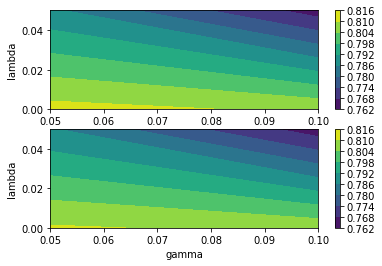

Test score for optimised parameters: 0.809960


(0.0, 0.05, 0.80996)

In [18]:
optitest(all_invas=1, eta_invas=0, eta_transform=1, res999=1, resoutliers=0, gauss=1, poly=1, degree=10)

C:\Users\TheTuckMachine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(250000, 33)
(250000, 33)
(250000, 33)
---
Features dimension before polynomial basis: (250000, 33)
Features dimension after polynomial basis: (250000, 891)
---
(250000, 891)
(250000, 891)
(250000, 921)
(250000, 922)
number of features: 922
lambda: 0.000000, opt. gamma: 0.050000
Current iteration=0, loss=0.6931471605599454
Current iteration=100, loss=0.4253191523049483
Current iteration=200, loss=0.41265827207747985
Current iteration=300, loss=0.40710284030603383
Current iteration=400, loss=0.40365743401427634
Current iteration=500, loss=0.4011861834690519
Current iteration=600, loss=0.3992754673312193
Current iteration=700, loss=0.3977301276250664
Current iteration=800, loss=0.39644212342013985
Current iteration=900, loss=0.3953450107050728
Current iteration=0, loss=0.6931471605599456
Current iteration=100, loss=0.42474669680751326
Current iteration=200, loss=0.41200525662738074
Current iteration=300, loss=0.4063727242544345
Current iteration=400, loss=0.4028714760843099
Current itera

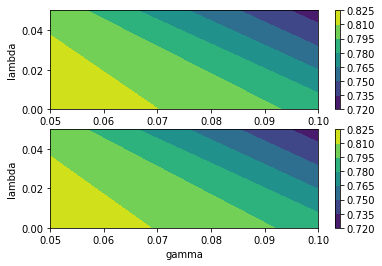

Test score for optimised parameters: 0.823200


(0.0, 0.05, 0.8232)

In [34]:
optitest(all_invas=1, eta_invas=0, eta_transform=1, res999=0, resoutliers=1, gauss=1, poly=1, degree=10)

In [ ]:
def dataprep(X, all_invas, eta_invas, eta_transform, res999, resoutliers, gauss, poly, degree):
    """performs the crossvalidation tests for a particular set of gammas, lambdas and feature transformations
    X: input points
    all_invas=1 if we are to include categorical features describing positions of invalid points for the whole dataset
    eta_invas=1 if we are to include categorical features corresponding to whether the "eta" features are invalid points
    eta_transform=1 if we are to compute the transform of the original dataset "eta" features and append them to the dataset
    res999=1 if the invalid points are to be replaced with the feature mean (excluding invalid values)
    resoutliers=1 if outliers at 95% percentile are to be clipped to the interval [0: 95 percentile]
    gauss=1 if we are to perform a skewness correction using log and cube transforms
    poly=1 if we are to add interaction features up to degree2 and add features corresponding to x^degree
    
    returns: prepared dataset
    """
    
    y=np.expand_dims(y, axis=1)
    y[y==-1]=0
    eta_columns=np.array([X[:,14], X[:,17], X[:,24]])
    invalid_pos_all=invalid_to_categorical(X)
    invalid_pos_eta=invalid_to_categorical(eta_columns)
    x=X
    if eta_transform==True:
        x=eta_to_theta_multiple_and_append(eta_columns, x)
        print(x.shape)
    if res999==True:
        x=unatools.resolve999values(x, 0, 0)
        print(x.shape)
    if resoutliers==True:
        x=unatools.removeOutliers(x,95)
        print(x.shape)
    if gauss==True:
        x=skewness_correction(x)
        print(x.shape)
    if poly==True:
        x=unatools.build_poly(x,1,1,degree)
        print(x.shape)

    x,_,__=ml.standardise(x)
    print(x.shape)
    if all_invas==True:
        x=np.column_stack((x,invalid_pos_all))
        print(x.shape)
    if eta_invas==True:
        x=np.column_stack((x,invalid_pos_eta.T))
        print(x.shape)
    x=ml.augment_data(np.array(x))
    print(x.shape)
    
    return x

In [21]:
from p1lib import tools_PT as pt

In [22]:
pt.log_transform

<function p1lib.tools_PT.log_transform>

In [23]:
X.shape

NameError: name 'X' is not defined

In [24]:
y, X, ids=proj1_helpers.load_csv_data('train.csv')

In [32]:
pt.log_transform(X)

array([[7.03744053, 6.95812039, 7.00108805, ..., 6.90899451, 6.90527721,
        7.01526079],
       [7.05698272, 6.97426186, 7.00600205, ..., 0.        , 0.        ,
        6.95294468],
       [0.        , 7.05804595, 7.02638507, ..., 0.        , 0.        ,
        6.95105516],
       ...,
       [7.0080141 , 6.96652029, 6.9808561 , ..., 0.        , 0.        ,
        6.94888954],
       [6.99846489, 6.92693222, 6.97430303, ..., 0.        , 0.        ,
        6.90775528],
       [0.        , 6.97798632, 6.97619026, ..., 0.        , 0.        ,
        6.90775528]])

In [33]:
pt.cube_transform(X).shape

(250000, 30)

In [28]:
X.shaoe

AttributeError: 'numpy.ndarray' object has no attribute 'shaoe'

In [29]:
X.shape

(250000, 30)

In [30]:
X

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [ ]:
from p1lib import tools_PT as pt

def optitest(all_invas, eta_invas, eta_transform, res999, resoutliers, gauss, poly, degree, logtrans, cubetrans):
    """performs the crossvalidation tests for a particular set of gammas, lambdas and feature transformations
    all_invas=1 if we are to include categorical features describing positions of invalid points for the whole dataset
    eta_invas=1 if we are to include categorical features corresponding to whether the "eta" features are invalid points
    eta_transform=1 if we are to compute the transform of the original dataset "eta" features and append them to the dataset
    res999=1 if the invalid points are to be replaced with the feature mean (excluding invalid values)
    resoutliers=1 if outliers at 95% percentile are to be clipped to the interval [0: 95 percentile]
    gauss=1 if we are to perform a skewness correction using log and cube transforms
    poly=1 if we are to add interaction features up to degree2 and add features corresponding to x^degree
    
    returns: optimal lambda and gamma and score on untouched test set
    """
    y, X, ids=proj1_helpers.load_csv_data('train.csv')
    y=np.expand_dims(y, axis=1)
    y[y==-1]=0
    eta_columns=np.array([X[:,14], X[:,17], X[:,24]])
    invalid_pos_all=invalid_to_categorical(X)
    invalid_pos_eta=invalid_to_categorical(eta_columns)
    x=X
    if eta_transform==True:
        x=eta_to_theta_multiple_and_append(eta_columns, x)
        print(x.shape)
    if res999==True:
        x=unatools.resolve999values(x, 0, 0)
        print(x.shape)
    if resoutliers==True:
        x=unatools.removeOutliers(x,95)
        print(x.shape)
    if gauss==True:
        x=skewness_correction(x)
        print(x.shape)
    if poly==True:
        x=unatools.build_poly(x,1,1,degree)
        print(x.shape)

    x,_,__=ml.standardise(x)
    print(x.shape)
    if all_invas==True:
        x=np.column_stack((x,invalid_pos_all))
        print(x.shape)
    if eta_invas==True:
        x=np.column_stack((x,invalid_pos_eta.T))
        print(x.shape)
    x=ml.augment_data(np.array(x))
    print(x.shape)
    
    x_train, y_train, x_test, y_test=ml.split_data(x, y, 0.8, seed=42)
    print('number of features: %i' %x.shape[1])
    max_iter=1001
    lambdas=np.array([0, 0.05])
    gammas=np.array([0.05, 0.1])
    w_ini=np.zeros((x_train.shape[1],1))

    optl, optg, testscore=crossval_grid(x_train, y_train, x_test, y_test, 4, lambdas, gammas, w_ini, max_iter, 42, 50)
    return optl, optg, testscore